In [40]:
import pandas as pd, numpy as np
import glob
import os
import csv
# 一次性merge多个pct_chg
from functools import reduce

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

# Prepare Tickers and Functions

In [142]:
def sp500():
    sp500_list = ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'HII', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DWDP', 'DPS', 'DTE', 'DRE', 'DUK', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FISV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IQV', 'IRM', 'JEC', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LEG', 'LEN', 'LUK', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'KORS', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PDCO', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RJF', 'RTN', 'O', 'RHT', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIG', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TROW', 'TPR', 'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'TMO', 'TIF', 'TWX', 'TJX', 'TMK', 'TSS', 'TSCO', 'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA', 'USB', 'UA', 'UAA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'HCN', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']
    return sp500_list

def all_weather():
    all_weather_portfolio = ["VTI","TLT","IEF","GLD","DBC"]
    return all_weather_portfolio

def us_sectors_etf():
    us_sectors = ["IYM","IYZ","FCL","FCD","IYE","IYG","IYH","IYJ","IYR","IYW","IDU"]
    return us_sectors

def get_code():
    codes = pro.stock_basic(list_status='L').ts_code.values
    return codes

# For processing ETFs:
def generate_ch_etfs_ticker_list(etf_info_path_file):
    ch_etfs_df = pd.read_csv(etf_info_path_file)
    ch_etfs_df.dropna(inplace = True)
    ch_etfs_df['基金规模\n[单位] 元'] = ch_etfs_df['基金规模\n[单位] 元'].apply(lambda x: float(x.replace(",","")))
    ch_etfs_df['机构投资者持有份额\n[报告期] 2019中报\n[单位] 份'] = ch_etfs_df['机构投资者持有份额\n[报告期] 2019中报\n[单位] 份'].apply(lambda x: float(x.replace(",","")))
    ch_etfs_df.sort_values("基金规模\n[单位] 元", ascending=False, inplace =True)
    ch_etfs_df = ch_etfs_df
    ch_etfs = ch_etfs_df.copy()
    ch_etfs['code'] =ch_etfs['证券代码'].apply(lambda x: str(x)[:6])
    ch_etfs_ticker_list = list(ch_etfs['code'].unique())
    return ch_etfs_ticker_list

def get_df_date_price_code(path, ticker_list, date_col, price_col, code_col):
    # for etf data cols are 'date', 'close', 'code'
    ticker_df_list = []
    for ticker in ticker_list:
        print("Reading Assets: ", ticker)
        try:
            ticker_df = pd.read_csv(path+ticker+".csv")
            ticker_df = ticker_df.sort_values(date_col)
            ticker_df = ticker_df[[date_col, price_col, code_col]]
            ticker_df['pct_chg'] = ticker_df[price_col].pct_change()
            ticker_df = ticker_df[[date_col, 'pct_chg']].dropna()
            ticker_df.columns = [date_col,ticker]
            ticker_df[date_col] = pd.to_datetime(ticker_df[date_col])
            ticker_df_list.append(ticker_df)
        except:
            pass
    return ticker_df_list

# 先为之后使用reduce铺路：创造一个merge的函数，这里的目的是为了将多资产数据基于date_col进行merge：
def merge_df(df1, df2, date_col="date"):
    # By default the etf's date_col goes by 'date'
    merged = df1.merge(df2, on = date_col, how = 'outer')
    merged.sort_values(date_col, inplace = True)
    return merged

def merge_df_for_corr(ticker_df_list, date_col):
    # Here below merge_df is a function instead of a variable
    merged_all = reduce(merge_df, ticker_df_list)
    # For etf data the date col is 'date'
    merged_all.set_index(date_col, inplace=True)
    merged_all.dropna(how="all", axis = 1, inplace = True)
    return merged_all

def select_N_lowest_corr_assets(merged_all, asset_category, n):
    # asset_category be default for etf is 'etf'
    # Create ETFs' correlation matrix dataframe
    merged_all_corr = merged_all.corr()
    merged_all_corr_abs = abs(merged_all_corr)
    corr_mean_dict = {}
    for row in merged_all_corr_abs.iterrows():
        row_list = list(row)
        print(row_list[0])
        print(np.mean(row_list[1]))
        corr_mean_dict[row_list[0]] = np.mean(row_list[1])
        print("========")
    corr_mean_df = pd.DataFrame()
    corr_mean_df[asset_category] = corr_mean_dict.keys()
    corr_mean_df['abs_corr_mean'] = corr_mean_dict.values()
    corr_mean_df_assets = corr_mean_df.sort_values("abs_corr_mean", ascending=True)
    lowest_corr_assets_list = list(corr_mean_df_assets[asset_category])[:n]
    return lowest_corr_assets_list

def select_df_from_db_by_tickers(path, ticker_list):
    # e.g. ch_db_path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/CH_database/"
    csv_path = path+"*.csv"
    files = glob.glob(csv_path)
    
    tickers_data = []
    if len(ticker_list)!=1:
        for ticker in ticker_list:
            print("Reading: ", ticker)
            df = pd.read_csv(path+ticker+".csv")
            tickers_data.append(df)
        tickers_data_concated = pd.concat(tickers_data)
        tickers_data_concated.reset_index(inplace=True)
        del tickers_data_concated['index']
    else:
        df = pd.read_csv(path+ticker_list[0]+".csv")
        tickers_data_concated = df
    return tickers_data_concated

def MACD(df, n_fast, n_slow, n_macd, price_col): # n_fast = 12, n_slow = 26
    """
    http://stockcharts.com/docs/doku.php?id=scans:indicators
    MACD, MACD Signal and MACD difference, rationale CHECKED, code CHECKED, updated
    # Conventional look-back window for calculating MACDsign is 9
    """
    EMAfast = df[price_col].ewm(span = n_fast, min_periods = n_fast - 1).mean()
    EMAslow = df[price_col].ewm(span = n_slow, min_periods = n_slow - 1).mean()
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = MACD.ewm(span = n_macd, min_periods = n_macd-1).mean().rename('MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    df['MACD_Diff'] = MACD
    df['MACD_Diff_EMA'] = MACDsign
    df['MACD'] = MACDdiff
    df['SIGNAL_STATUS'] = df['MACD'].apply(lambda x: "多头状态" if x>0 else ("空头状态" if x<0 else "无信号状态"))
    return df

def calc_macd_signals(tickers_data_concated, ticker_list, code_col, ticker_type, price_col):
    signal_record = []
    signal_data = []
    if len(ticker_list)!=1:
        for ticker in ticker_list:
            print("Calculating Signal for: ", ticker)
            try:
                if ticker_type == "float":
                # Be aware of types of ticker values here, whether it's float or strings, depends.
                    single_ticker_df = tickers_data_concated[tickers_data_concated[code_col]==float(ticker)]
                elif ticker_type == "string":
                    single_ticker_df = tickers_data_concated[tickers_data_concated[code_col]==ticker]
                signal_df = MACD(single_ticker_df, 12, 26, 9, price_col)
#                 last_signal = signal_df[[code_col,'SIGNAL_STATUS']].values[-1]
                signal_data.append(signal_df)
#                 signal_record.append(last_signal)
            except:
                pass
        signal_data_df = pd.concat(signal_data)
    else:
        print("Calculating Signal for: ", ticker_list[0])
        try:                
            print("getting thru")
            signal_df = MACD(tickers_data_concated, 12, 26, 9, price_col)
#             last_signal = signal_df[[code_col,'SIGNAL_STATUS']].values[-1]
#             signal_data.append(signal_df)
#             signal_record.append(last_signal)
        except:
            pass
        signal_data_df = signal_df
    return signal_data_df
    
    
def make_numeric_signals(series):
    for item in series:
#         print(item)
        if item =="多":
            return 1
        elif item =="空":
            return -1
        else:
            return 0
        
def generate_most_recent_signal_data_v1(signal_data_df, date_col, code_col):
    # v1 is the version of generating the og macd signals
    signal_data_df['SIGNAL_DIRECTION'] = signal_data_df['SIGNAL_STATUS'].apply(lambda x: make_numeric_signals(x))
    signal_data_df['SIGNAL_DIRECTION_DIFF'] = signal_data_df.groupby([code_col])['SIGNAL_DIRECTION'].diff()
    signal_data_df['SIGNAL_ACTION'] = signal_data_df['SIGNAL_DIRECTION_DIFF'].apply(lambda x: "LONG" if x==2 else("SHORT" if x==-2 else "NO CHANGE"))
    most_recent_signals = signal_data_df.groupby([code_col])[[date_col,code_col,'SIGNAL_STATUS','SIGNAL_ACTION']].tail(1)
    return most_recent_signals

def check_macd_signal_plot(signal_data_df, ticker, cols_list_to_plot, code_col, N_tails, date_col):
    signal_data_df_copy = signal_data_df.copy()
    signal_data_df_copy.set_index(date_col, inplace = True)
    df_to_plot = signal_data_df_copy[signal_data_df_copy[code_col]==ticker][cols_list_to_plot].tail(N_tails)
    df_to_plot.plot(figsize = (18, 6))
    plt.title("{}".format(ticker))

In [8]:
ch_db_path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/CH_database/"
us_db_path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/US_database/"
etf_info_path_file = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/CH_ETFs.csv"

# On ETFs

In [129]:
# On etfs:
ch_etfs_ticker_list = generate_ch_etfs_ticker_list(etf_info_path_file)
etf_ticker_df_list = get_df_date_price_code(ch_db_path, ch_etfs_ticker_list, 'date', 'close', 'code')
merged_etfs = merge_df_for_corr(etf_ticker_df_list, 'date')
lowest_corr_etf_list = select_N_lowest_corr_assets(merged_etfs, "etf", 20)
lowest_corr_etf_df = select_df_from_db_by_tickers(ch_db_path, lowest_corr_assets_list)
lowest_corr_etf_macd_signals = calc_macd_signals(lowest_corr_etf_df, lowest_corr_etf_list, 'code', 'float','close')
most_recent_etf_macd_signals = generate_most_recent_signal_data_v1(lowest_corr_etf_macd_signals, 'date','code')

Reading Assets:  510500
Reading Assets:  510050
Reading Assets:  510300
Reading Assets:  510330
Reading Assets:  159919
Reading Assets:  510180
Reading Assets:  159915
Reading Assets:  512960
Reading Assets:  512950
Reading Assets:  510810
Reading Assets:  512880
Reading Assets:  510900
Reading Assets:  518880
Reading Assets:  510310
Reading Assets:  159901
Reading Assets:  512500
Reading Assets:  159920
Reading Assets:  159949
Reading Assets:  510230
Reading Assets:  510850
Reading Assets:  159959
Reading Assets:  511030
Reading Assets:  510390
Reading Assets:  510510
Reading Assets:  510380
Reading Assets:  512000
Reading Assets:  159962
Reading Assets:  510360
Reading Assets:  159928
Reading Assets:  159922
Reading Assets:  510880
Reading Assets:  159938
Reading Assets:  510590
Reading Assets:  159902
Reading Assets:  512660
Reading Assets:  512070
Reading Assets:  159939
Reading Assets:  511220
Reading Assets:  512900
Reading Assets:  512380
Reading Assets:  512800
Reading Assets: 

/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Calculating Signal for:  159926
Calculating Signal for:  511030
Calculating Signal for:  511280
Calculating Signal for:  511290
Calculating Signal for:  518880
Calculating Signal for:  511010
Calculating Signal for:  511310
Calculating Signal for:  511270
Calculating Signal for:  511020
Calculating Signal for:  513680
Calculating Signal for:  513500
Calculating Signal for:  513100
Calculating Signal for:  510120
Calculating Signal for:  513900
Calculating Signal for:  159941
Calculating Signal for:  510430
Calculating Signal for:  513030
Calculating Signal for:  510680
Calculating Signal for:  510090
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
多
多
多
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空


多
多
多
多
多
多
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
多
多
空
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
空
空
空
空
多
空
空
空
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
多
多


无
无
无
无
无
无
无
无
无
无
无
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
多
多
多
空
多
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
多
多
空
空
空
空
空
空
空
空
空
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
空
空
多
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多


多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
空
多
空
空
空
空
空
空
空
空
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
无
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多
多
多
空
空
空
空
空
多
多
多
多
多
多
多
多
多
多
多
多
多


In [130]:
lowest_corr_etf_macd_signals[lowest_corr_etf_macd_signals['code']==511220].head(2)

,date,open,close,high,low,volume,code,MACD_Diff,MACD_Diff_EMA,MACD,SIGNAL_STATUS,SIGNAL_DIRECTION,SIGNAL_DIRECTION_DIFF,SIGNAL_ACTION
0,2014-12-16,96.000,94.930,96.000,94.902,1652.0,511220,NaN,NaN,NaN,无信号状态,0,NaN,NO CHANGE
1,2014-12-17,94.931,94.911,95.038,94.602,1462.0,511220,NaN,NaN,NaN,无信号状态,0,0.0,NO CHANGE


In [121]:
print(lowest_corr_assets_list)

['511220', '159926', '511030', '511280', '511290', '518880', '511010', '511310', '511270', '511020', '513680', '513500', '513100', '510120', '513900', '159941', '510430', '513030', '510680', '510090']


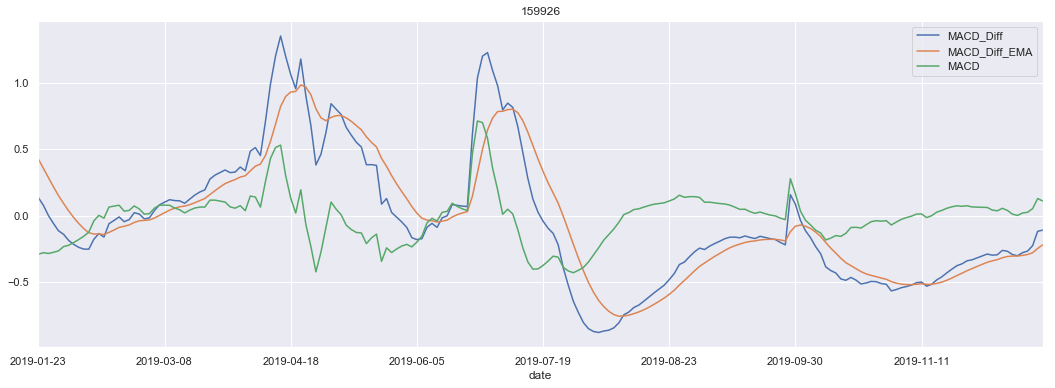

In [131]:
etf_to_check = 159926
check_macd_signal_plot(lowest_corr_etf_macd_signals, etf_to_check, ['MACD_Diff','MACD_Diff_EMA','MACD'], 'code', 200, 'date')

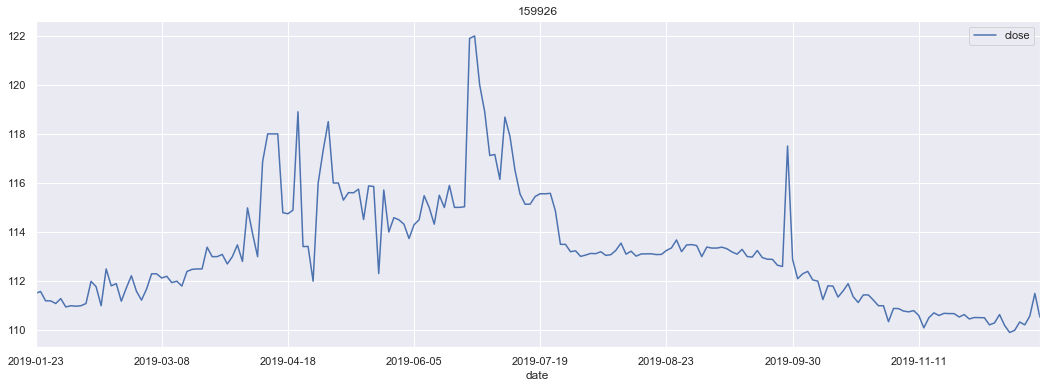

In [132]:
check_macd_signal_plot(lowest_corr_etf_macd_signals, etf_to_check, ['close'], 'code', 200, 'date')

In [37]:
most_recent_etf_macd_signals

,date,code,SIGNAL_STATUS,SIGNAL_ACTION
1223,2020-01-03,511220,多头状态,NO CHANGE
2376,2020-01-03,159926,多头状态,NO CHANGE
2562,2020-01-03,511030,空头状态,NO CHANGE
2818,2020-01-02,511280,多头状态,NO CHANGE
3022,2020-01-03,511290,空头状态,NO CHANGE
4593,2020-01-03,518880,多头状态,NO CHANGE
6246,2020-01-03,511010,多头状态,NO CHANGE
6494,2019-12-24,511310,多头状态,NO CHANGE
6766,2020-01-03,511270,多头状态,NO CHANGE
6960,2020-01-02,511020,多头状态,NO CHANGE


# On stocks

In [104]:
MACD(stock_df, 12, 26, 9, 'Adj Close')

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,MACD_Diff,MACD_Diff_EMA,MACD,SIGNAL_STATUS
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,TSLA,NaN,NaN,NaN,无信号状态
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,TSLA,NaN,NaN,NaN,无信号状态
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,TSLA,NaN,NaN,NaN,无信号状态
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,TSLA,NaN,NaN,NaN,无信号状态
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,TSLA,NaN,NaN,NaN,无信号状态
...,...,...,...,...,...,...,...,...,...,...,...,...
2391,2019-12-27,430.380005,430.380005,435.309998,426.109985,435.000000,9945700,TSLA,25.600474,18.943054,6.657420,多头状态
2392,2019-12-30,414.700012,414.700012,429.000000,409.260010,428.790009,12586400,TSLA,26.253541,20.405152,5.848390,多头状态
2393,2019-12-31,418.329987,418.329987,421.290009,402.079987,405.000000,10285700,TSLA,24.568240,21.237769,3.330471,多头状态
2394,2020-01-02,430.260010,430.260010,430.700012,421.709991,424.500000,9532100,TSLA,24.523422,21.894900,2.628523,多头状态


In [145]:
# On etfs:
us_stocks_ticker_list = ['TSLA','QQQ']
# us_stock_ticker_df_list = get_df_date_price_code(us_db_path, us_stocks_ticker_list, 'Date', 'Adj Close', 'Ticker')
# merged_us_stocks = merge_df_for_corr(us_stock_ticker_df_list, 'Date')
# lowest_corr_etf_list = select_N_lowest_corr_assets(merged_etfs, "etf", 20)
stock_df = select_df_from_db_by_tickers(us_db_path, us_stocks_ticker_list)
macd_signals = calc_macd_signals(stock_df, us_stocks_ticker_list, 'Ticker','string', 'Adj Close')
most_recent_us_stock_macd_signals = generate_most_recent_signal_data_v1(macd_signals, 'Date','Ticker')

Reading:  TSLA
Reading:  QQQ
Calculating Signal for:  TSLA
Calculating Signal for:  QQQ


/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [146]:
most_recent_us_stock_macd_signals

,Date,Ticker,SIGNAL_STATUS,SIGNAL_ACTION
2395,2020-01-03,TSLA,多头状态,NO CHANGE
7635,2020-01-03,QQQ,多头状态,NO CHANGE


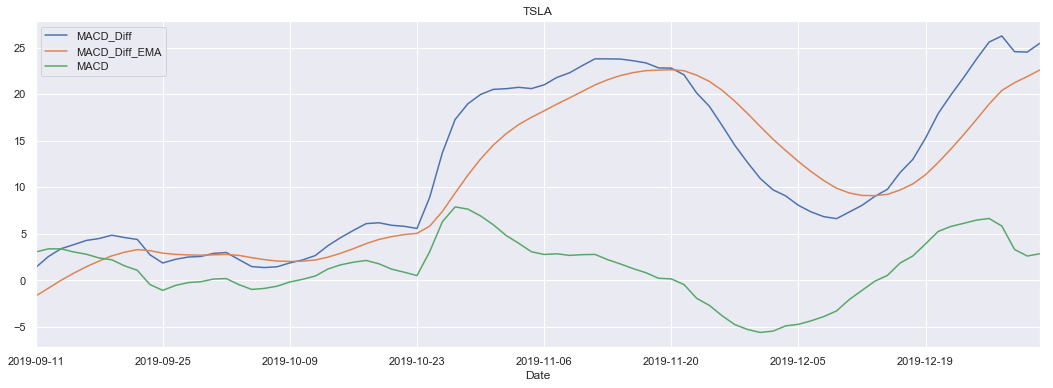

In [150]:
stock_to_check = 'TSLA'
check_macd_signal_plot(macd_signals, stock_to_check, ['MACD_Diff','MACD_Diff_EMA','MACD'], 'Ticker', 80, 'Date')